In [1]:
# Dependencies

import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
'''
Data picked: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
'''
df = pd.read_csv("/Users/neha.arora/Documents/github/The_Math_Of_Intelligence/week1/kc_house_data.csv", header=None)
dfTrain = df.filter([5,2], axis=1).loc[1:].dropna()
dfTrain = dfTrain.values.astype(float)
weights = np.zeros(2)

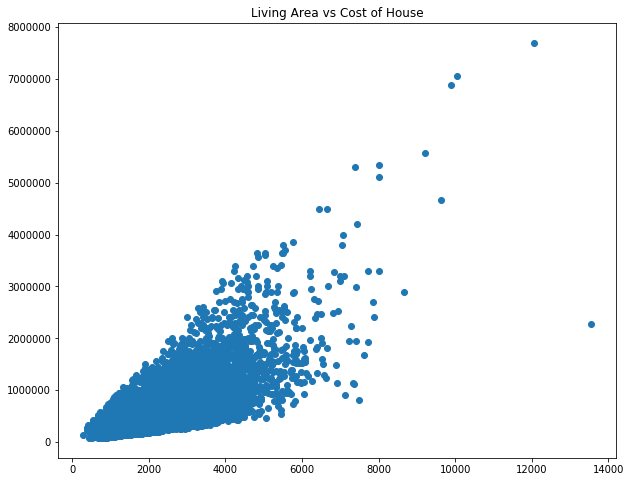

In [3]:
'''
The independent variable takes into account the feature:
GrLivArea: Above grade (ground) living area square feet

Variable being predicted: SalePrice

Plots to analyze the relationship of each variable with the variable being predicted
'''

import matplotlib.pyplot as plt

plt.scatter(dfTrain[:,0], dfTrain[:,1])
plt.title("Living Area vs Cost of House")

plt.show()

In [4]:
'''
Feature scaling (normalization) to ensure proportionate contribution of features to objective function
X(i) = (X(i) - mean(X(i)))/std(X(i)) , X(i) represents the i th feature of dataset
'''

def normalizeFeatures(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    normalizedX = (X-mean)/std
    return normalizedX


In [5]:
'''
Predict the value(s) for given data point(s) X and weight vector theta
h(theta, X) = X * theta'
where h(theta, X) is the value based on hypothesis given theta and X

X : [m x (n+1)]
theta : [1 x (n+1)]
(m: examples in data set
 n: feature space of X)
 
Returns predicted values y
y : [m x 1]
'''
def predict(X, theta):
    y = np.dot(X, theta.T)
    return y

In [6]:
'''
Objective function that needs to be minimized for optimal solution
Error calculation using SSE: Sum of Squared Errors
E = 1/(2*m) * ((h(theta,X) - y) ** 2)

Returns the sum of squared errors value for the data point(s) X
'''

def SSE(X, theta, y):
    predicted = predict(X, theta)
    error = predicted - y
    squaredErrors = np.dot(error.T, error)
    sse = np.sum(squaredErrors)/(2*X.shape[0])
    return sse

In [7]:
'''
Gradient calculation for the objective function
(E : SSE, 
theta : w (the weight vector))

dE/dw = dE/dh * dh/dw
(h : predict function for given X and theta (w))

dE/dw(i) = 1/(2*m) * (-2 * (h(theta, X) - y)) * dh/dw(i)
dE/dw(i) = -1/m * (h(theta, X) - y)) * X(i)

Returns a vector of gradients

'''
def gradient(X, theta, y):
    grad = np.dot(X.T, predict(X, theta) - y)/X.shape[0]
    return grad.T

In [8]:
'''
Gradient Descent to minimize loss

Two approaches:
1) Batch Gradient Descent: Use all the examples of the training set to determine the update in weight parameters
2) Stochastic Gradient Descent: Use one example of the training set at a time to update weight parameters
'''
def gradient_descent_step(X, theta, y, alpha):
    grad = gradient(X, theta, y)
    theta = theta - alpha * grad
    return theta

def batch_gradient_descent (X, theta, y, num_iters, alpha):
    error_record = np.zeros(num_iters)
    for iter in range(num_iters):
        error_record[iter] = SSE(X, theta, y)
        theta = gradient_descent_step(X, theta, y, alpha)
    return [theta, error_record]

def stochastic_gradient_descent (X, theta, y, num_iters, alpha):
    error_record = np.zeros(num_iters)
    for iter in range(num_iters):
        for rec in range(X.shape[0]):
            theta = gradient_descent_step(X[rec], theta, y[rec], alpha)
        error_record[iter] = SSE(X, theta, y)
    return [theta, error_record]
    

In [9]:
'''
Verify gradients computed with normal equation

y = X * Theta
X' * y = X' * X * Theta
X' * y = (X' * X) * Theta
Theta = ((X' * X) ** -1) * X' * y

'''
def verifyTheta(X, y):
    thetaComputed = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return thetaComputed

In [10]:
'''
Initialize weights and compare results of gradient descent and normal equation
'''

for i in range(weights.shape[0]):
    weights[i] = random.random()

XTrain = normalizeFeatures(dfTrain)
XTemp = np.ones((XTrain.shape[0], XTrain.shape[1]+1))
XTemp[:,1:] = XTrain
XTrain = XTemp

features = XTrain[:,0:2]
pred = XTrain[:,2]
thetaComputed = verifyTheta(features, pred)
print (thetaComputed)
[theta1, error_record1] = batch_gradient_descent(features, weights, pred, 1000, 0.01)
print (theta1)
[theta2, error_record2] = stochastic_gradient_descent(features, weights, pred, 1000, 0.01)
print (theta2)


[  8.38313118e-17   7.02035055e-01]
[  1.90002001e-05   7.02012132e-01]
[ 0.04322201  0.76272289]


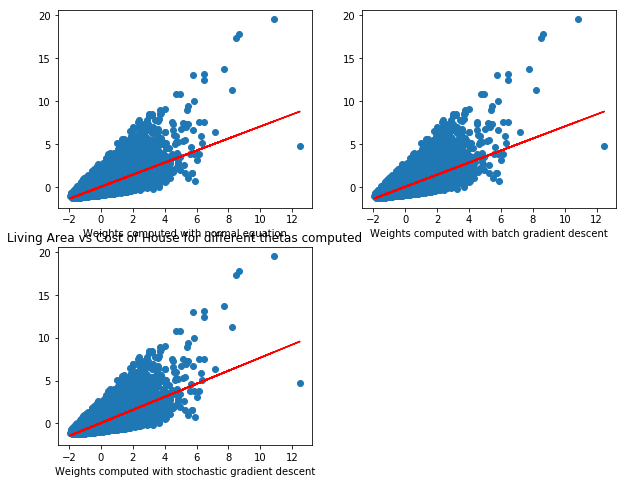

In [11]:
plt.subplot(221)
plt.scatter(features[:,1], pred)
plt.plot(features[:,1], features[:,1]*thetaComputed[1] + thetaComputed[0], 'r')
plt.xlabel("Weights computed with normal equation")

plt.subplot(222)
plt.scatter(features[:,1], pred)
plt.plot(features[:,1], features[:,1]*theta1[1] + theta1[0], 'r')
plt.xlabel("Weights computed with batch gradient descent")

plt.subplot(223)
plt.scatter(features[:,1], pred)
plt.plot(features[:,1], features[:,1]*theta2[1] + theta2[0], 'r')
plt.xlabel("Weights computed with stochastic gradient descent")

plt.title("Living Area vs Cost of House for different thetas computed")
plt.show()

